# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 15)

In [3]:
df = pd.read_excel('geo.xlsx', usecols='B:D')

In [4]:
df.head()

x          y  comment_class
0  37.612416  55.777454             -1
1  37.612416  55.777454             -1
2  37.603298  55.742108             -1
3  37.558526  55.728758             -1
4  37.566431  55.731794             -1

In [5]:
box_borders = [df.x.min(), df.x.max(), df.y.min(), df.y.max()]

In [6]:
box_borders

[37.148813, 37.931228, 55.496939, 55.994174]

In [7]:
m_map = plt.imread('Moscow.png')

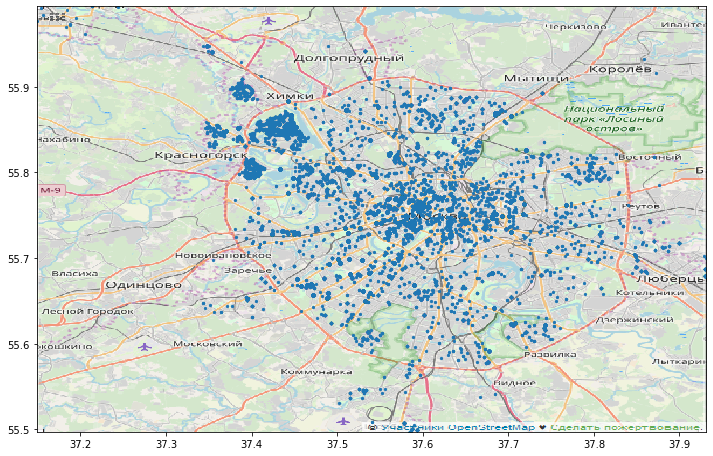

In [8]:
fig, ax = plt.subplots(figsize = (12,15))
ax.scatter(df.x, df.y, alpha=1, s=5)
ax.set_xlim(box_borders[0], box_borders[1])
ax.set_ylim(box_borders[2], box_borders[3])
ax.imshow(m_map, extent=box_borders)

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation, OPTICS
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler

In [10]:
coord = np.array(df[['x', 'y']])

In [11]:
coord

array([[37.612416, 55.777454],
       [37.612416, 55.777454],
       [37.603298, 55.742108],
       ...,
       [37.421066, 55.848756],
       [37.448509, 55.793065],
       [37.451249, 55.83662 ]])

In [12]:
scaler = StandardScaler()
coord_scaled = scaler.fit_transform(coord)

In [13]:
model = KMeans(n_clusters=8)
# model = DBSCAN(eps=0.1, min_samples=5)
classes = model.fit_predict(coord_scaled)

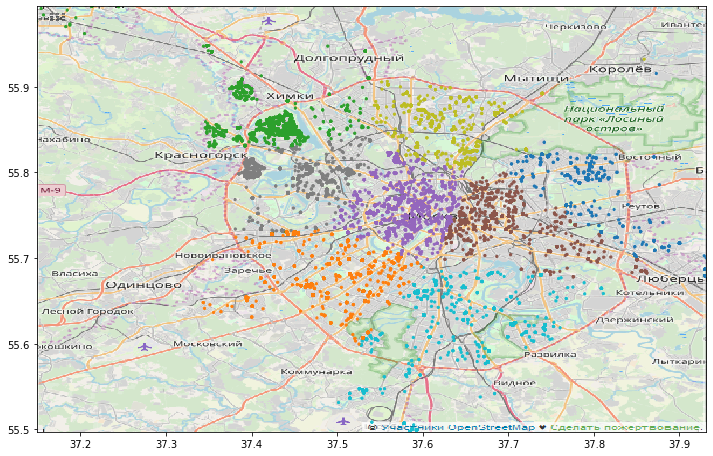

In [14]:
fig, ax = plt.subplots(figsize = (12,15))
ax.scatter(df.x, df.y, c=classes, cmap='tab10', alpha=1, s=5)
ax.set_xlim(box_borders[0], box_borders[1])
ax.set_ylim(box_borders[2], box_borders[3])
ax.imshow(m_map, extent=box_borders)

# Selecting cluster number

In [15]:
k_inertia = []
ks = range(1,17)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(coord_scaled)
    k_inertia.append(clf_kmeans.inertia_)

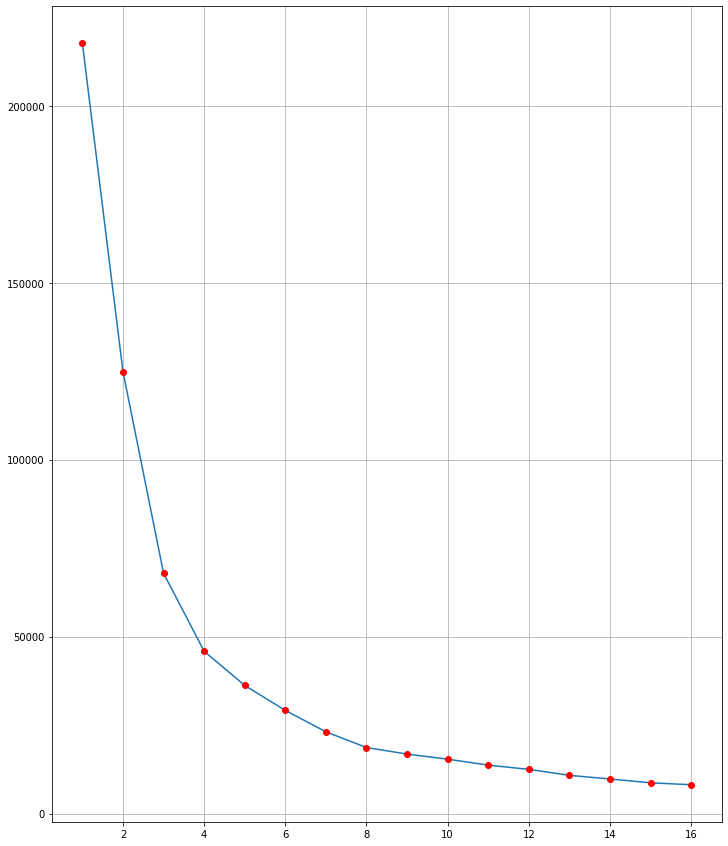

In [16]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.grid()

In [17]:
diff = np.diff(k_inertia)
diff

array([-92728.56881302, -56974.01194797, -22050.80946191,  -9663.7550007 ,
        -7046.4878283 ,  -6053.49756001,  -4441.15729825,  -1855.66548663,
        -1442.53045834,  -1673.5111434 ,  -1201.62964984,  -1692.84835048,
        -1029.51223437,  -1076.23688891,   -548.313832  ])

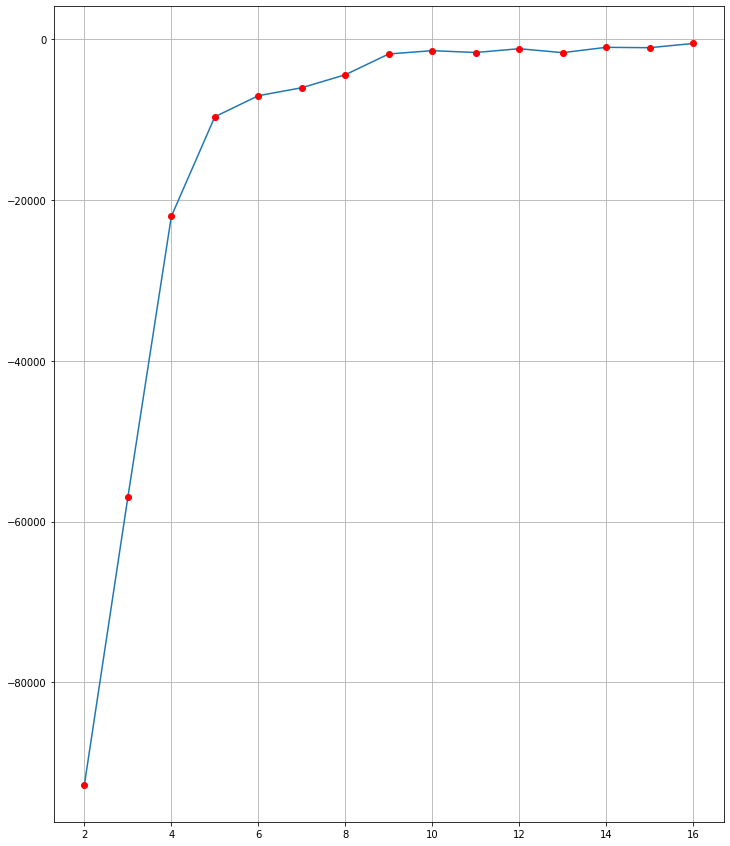

In [18]:
plt.plot(ks[1:], diff)
plt.plot(ks[1:], diff, 'ro')
plt.grid()

In [19]:
diff_r = diff[1:]/diff[:-1]
diff_r

array([0.61441703, 0.38703277, 0.43824944, 0.72916665, 0.85908011,
       0.73365146, 0.41783377, 0.77736557, 1.16012188, 0.71802907,
       1.40879376, 0.60815385, 1.04538523, 0.50947318])

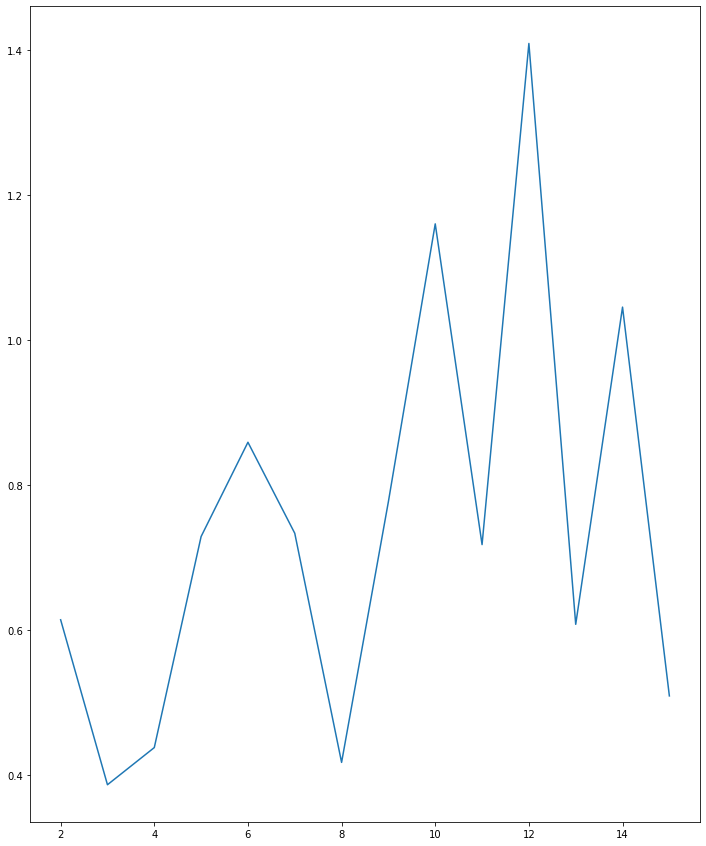

In [20]:
plt.plot(ks[1:-1], diff_r)

In [21]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

### Optimal cluster number - 3
Let's draw

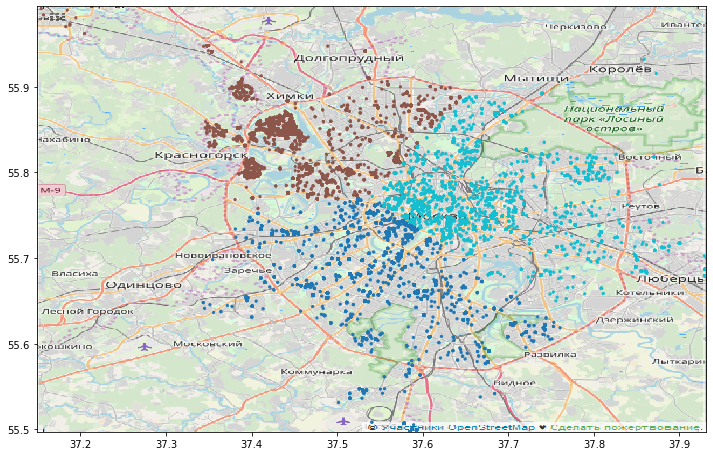

In [22]:
model = KMeans(n_clusters=3)
# model = DBSCAN(eps=0.1, min_samples=5)
classes = model.fit_predict(coord_scaled)
fig, ax = plt.subplots(figsize = (12,15))
ax.scatter(df.x, df.y, c=classes, cmap='tab10', alpha=1, s=5)
ax.set_xlim(box_borders[0], box_borders[1])
ax.set_ylim(box_borders[2], box_borders[3])
ax.imshow(m_map, extent=box_borders)

Мне не нравится число 3, то что получается, поэтому решил попробовать несколько других метрик - в sklear их много. https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

Попробую Calinski-Harabasz и Davies-Bouldin. Silhoutte слишком долго считается

In [23]:
ks = range(2,18)
Sil = []
CH = []
DB = []
inert = []

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(coord_scaled)
    labels = clf_kmeans.labels_
#     Sil.append(metrics.silhouette_score(coord_scaled, labels, metric='euclidean'))
#     print('Current run Sil: ', k)
    CH.append(metrics.calinski_harabasz_score(coord_scaled, labels))
#     print('Current run CH: ', k)
    DB.append(metrics.davies_bouldin_score(coord_scaled, labels))
#     print('Current run DB: ', k)
    inert.append(clf_kmeans.inertia_)
    
diff = np.diff(inert)
diff_r = diff[1:]/diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
print('Optimal cluster number with inertia:', k_opt)

Optimal cluster number with inertia: 3


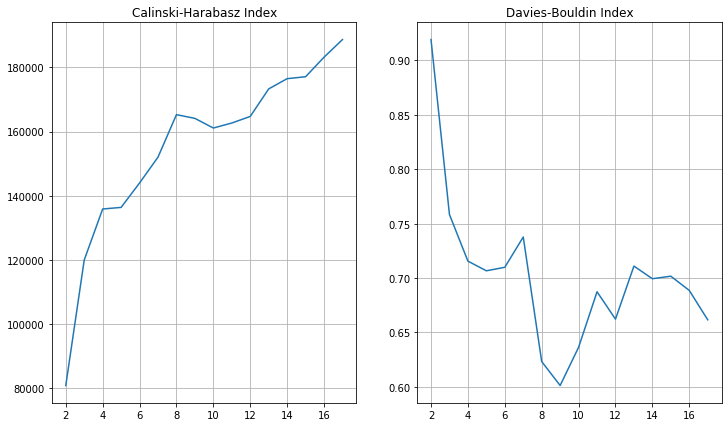

In [24]:
rcParams['figure.figsize'] = (12, 7)
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.plot(ks, CH)
plt.grid()
plt.title('Calinski-Harabasz Index')

plt.subplot(1, 2, 2)
plt.plot(ks, DB)
plt.grid()
plt.title('Davies-Bouldin Index')

plt.show()

Мне кажется, что оптимальное кол-во кластеров - 8. Это локальный максимум Calinski-Harabasz и глобальный минимум Davies-Bouldin. Рисуем 

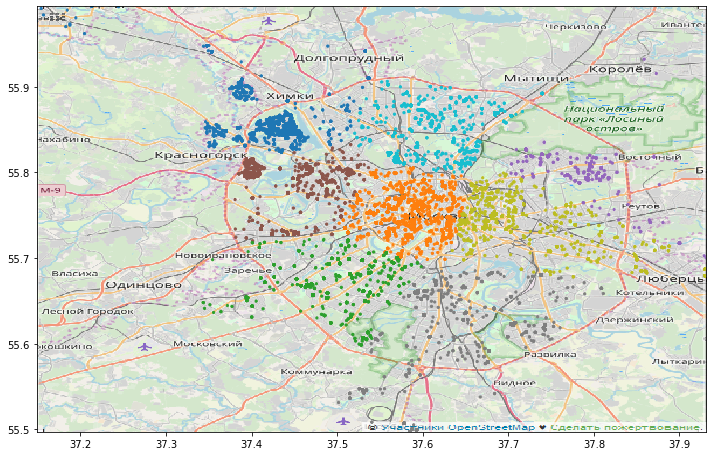

In [25]:
model = KMeans(n_clusters=8)
# model = DBSCAN(eps=0.1, min_samples=5)
classes = model.fit_predict(coord_scaled)
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(df.x, df.y, c=classes, cmap='tab10', alpha=1, s=5)
ax.set_xlim(box_borders[0], box_borders[1])
ax.set_ylim(box_borders[2], box_borders[3])
ax.imshow(m_map, extent=box_borders)

Мне с 8-ю кластерами очень картинка нравится - кластеры очень похожи на реальные административные округа. Деление - по крупным магистралям. 

# Positive responce

In [26]:
df_pos = df.query('comment_class==1')
coord = np.array(df_pos[['x','y']])
len(coord)

13659

На таком кол-ве можно считать и метрику Silhouette

In [27]:
scaler = StandardScaler()
coord_scaled = scaler.fit_transform(coord)

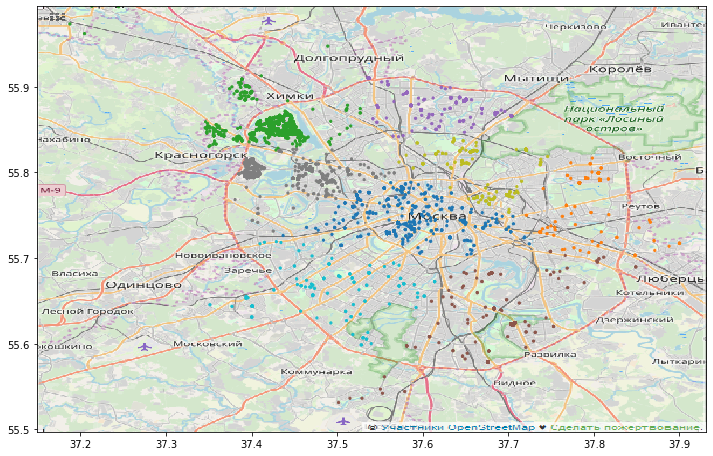

In [28]:
model = KMeans(n_clusters=8)
# model = DBSCAN(eps=0.1, min_samples=5)
classes = model.fit_predict(coord_scaled)
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(df_pos.x, df_pos.y, c=classes, cmap='tab10', alpha=1, s=5)
ax.set_xlim(box_borders[0], box_borders[1])
ax.set_ylim(box_borders[2], box_borders[3])
ax.imshow(m_map, extent=box_borders)

In [29]:
ks = range(2,18)
Sil = []
CH = []
DB = []
inert = []

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(coord_scaled)
    labels = clf_kmeans.labels_
    Sil.append(metrics.silhouette_score(coord_scaled, labels, metric='euclidean'))
    print('Current run Sil: ', k)
    CH.append(metrics.calinski_harabasz_score(coord_scaled, labels))
    print('Current run CH: ', k)
    DB.append(metrics.davies_bouldin_score(coord_scaled, labels))
    print('Current run DB: ', k)
    inert.append(clf_kmeans.inertia_)
    
diff = np.diff(inert)
diff_r = diff[1:]/diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
print('Optimal cluster number with inertia:', k_opt)

Current run Sil:  2
Current run CH:  2
Current run DB:  2
Current run Sil:  3
Current run CH:  3
Current run DB:  3
Current run Sil:  4
Current run CH:  4
Current run DB:  4
Current run Sil:  5
Current run CH:  5
Current run DB:  5
Current run Sil:  6
Current run CH:  6
Current run DB:  6
Current run Sil:  7
Current run CH:  7
Current run DB:  7
Current run Sil:  8
Current run CH:  8
Current run DB:  8
Current run Sil:  9
Current run CH:  9
Current run DB:  9
Current run Sil:  10
Current run CH:  10
Current run DB:  10
Current run Sil:  11
Current run CH:  11
Current run DB:  11
Current run Sil:  12
Current run CH:  12
Current run DB:  12
Current run Sil:  13
Current run CH:  13
Current run DB:  13
Current run Sil:  14
Current run CH:  14
Current run DB:  14
Current run Sil:  15
Current run CH:  15
Current run DB:  15
Current run Sil:  16
Current run CH:  16
Current run DB:  16
Current run Sil:  17
Current run CH:  17
Current run DB:  17
Optimal cluster number with inertia: 3


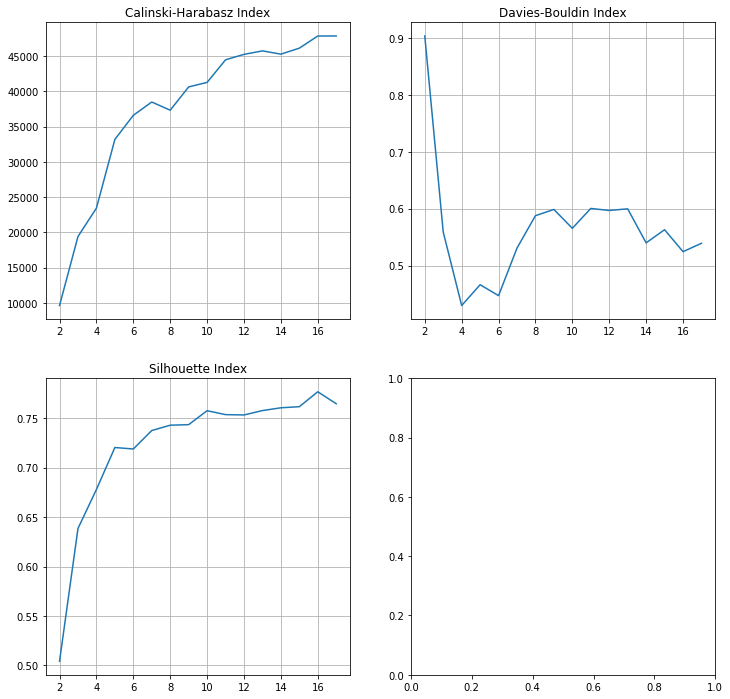

In [30]:
rcParams['figure.figsize'] = (12, 12)
plt.subplots(2, 2)
plt.subplot(2, 2, 1)
plt.plot(ks, CH)
plt.grid()
plt.title('Calinski-Harabasz Index')

plt.subplot(2, 2, 2)
plt.plot(ks, DB)
plt.grid()
plt.title('Davies-Bouldin Index')

plt.subplot(2, 2, 3)
plt.plot(ks, Sil)
plt.grid()
plt.title('Silhouette Index')

plt.show()

Здесь менее понятно... ну пусть будет 4. Хотя и для 8-ми неплохо смотрится

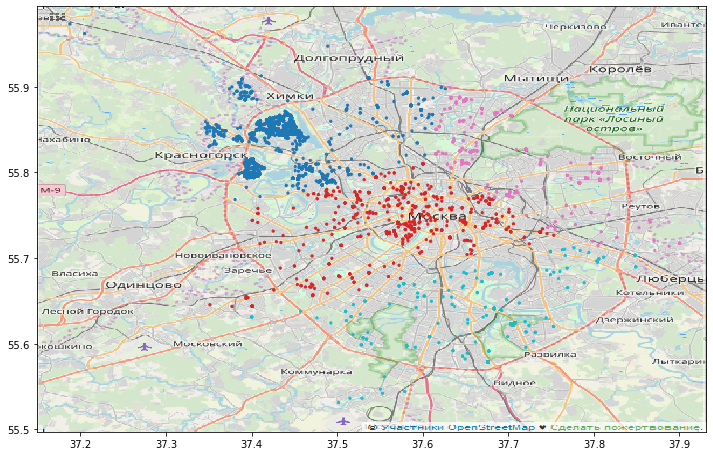

In [31]:
model = KMeans(n_clusters=4)
# model = DBSCAN(eps=0.1, min_samples=5)
classes = model.fit_predict(coord_scaled)
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(df_pos.x, df_pos.y, c=classes, cmap='tab10', alpha=1, s=5)
ax.set_xlim(box_borders[0], box_borders[1])
ax.set_ylim(box_borders[2], box_borders[3])
ax.imshow(m_map, extent=box_borders)

# Negative response

In [32]:
df_neg = df.query('comment_class==-1')
coord = np.array(df_neg[['x','y']])
len(coord)

95147

In [33]:
scaler = StandardScaler()
coord_scaled = scaler.fit_transform(coord)

In [34]:
ks = range(2,18)
Sil = []
CH = []
DB = []
inert = []

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(coord_scaled)
    labels = clf_kmeans.labels_
#     Sil.append(metrics.silhouette_score(coord_scaled, labels, metric='euclidean'))
#     print('Current run Sil: ', k)
    CH.append(metrics.calinski_harabasz_score(coord_scaled, labels))
    print('Current run CH: ', k)
    DB.append(metrics.davies_bouldin_score(coord_scaled, labels))
    print('Current run DB: ', k)
    inert.append(clf_kmeans.inertia_)
    
diff = np.diff(inert)
diff_r = diff[1:]/diff[:-1]
k_opt = ks[np.argmin(diff_r)+1]
print('Optimal cluster number with inertia:', k_opt)

Current run CH:  2
Current run DB:  2
Current run CH:  3
Current run DB:  3
Current run CH:  4
Current run DB:  4
Current run CH:  5
Current run DB:  5
Current run CH:  6
Current run DB:  6
Current run CH:  7
Current run DB:  7
Current run CH:  8
Current run DB:  8
Current run CH:  9
Current run DB:  9
Current run CH:  10
Current run DB:  10
Current run CH:  11
Current run DB:  11
Current run CH:  12
Current run DB:  12
Current run CH:  13
Current run DB:  13
Current run CH:  14
Current run DB:  14
Current run CH:  15
Current run DB:  15
Current run CH:  16
Current run DB:  16
Current run CH:  17
Current run DB:  17
Optimal cluster number with inertia: 3


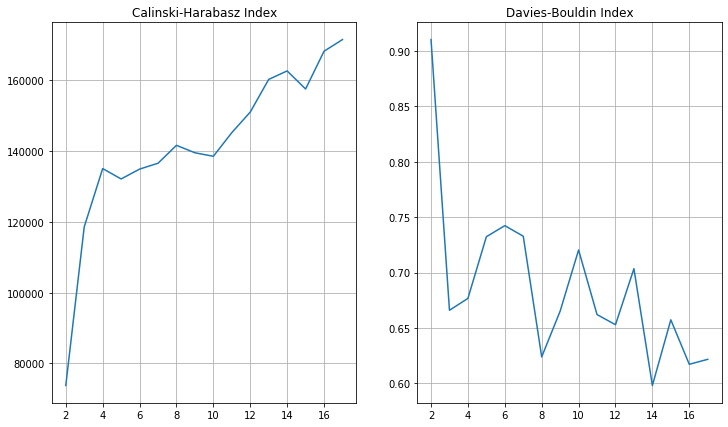

In [35]:
rcParams['figure.figsize'] = (12, 7)
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.plot(ks, CH)
plt.grid()
plt.title('Calinski-Harabasz Index')

plt.subplot(1, 2, 2)
plt.plot(ks, DB)
plt.grid()
plt.title('Davies-Bouldin Index')

plt.show()

Хорошее число - 3 и 4. При большом кол-ве кластеров метрики зависят от начального положения.

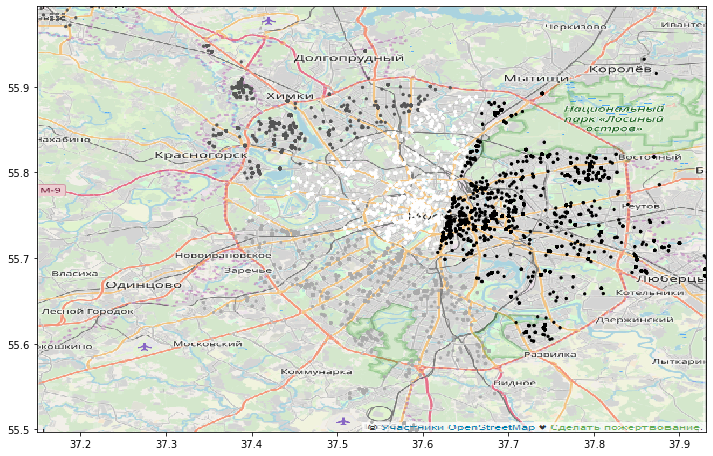

In [36]:
model = KMeans(n_clusters=4)
# model = DBSCAN(eps=0.1, min_samples=5)
classes = model.fit_predict(coord_scaled)
fig, ax = plt.subplots(figsize = (12,12))
ax.scatter(df_neg.x, df_neg.y, c=classes, cmap='gray', alpha=1, s=5)
ax.set_xlim(box_borders[0], box_borders[1])
ax.set_ylim(box_borders[2], box_borders[3])
ax.imshow(m_map, extent=box_borders)

# Активность голосования

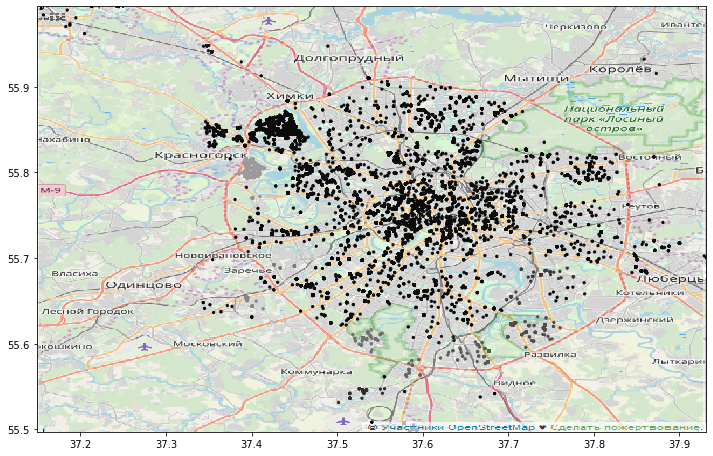

In [37]:
coord = np.array(df[['x', 'y']])

scaler = StandardScaler()
coord_scaled = scaler.fit_transform(coord)

model = DBSCAN(eps=0.15, min_samples=10)
classes = model.fit_predict(coord_scaled)
fig, ax = plt.subplots(figsize = (12,15))
ax.scatter(df.x, df.y, c=classes, cmap='gray', alpha=1, s=5)
ax.set_xlim(box_borders[0], box_borders[1])
ax.set_ylim(box_borders[2], box_borders[3])
ax.imshow(m_map, extent=box_borders)

In [38]:
np.unique(classes)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22], dtype=int64)

In [39]:
pd.Series(classes).value_counts()

 0     104386
 6       1067
 13       866
 18       747
 1        274
 7        260
 9        229
 15       164
 2        149
-1        105
 4         87
 22        72
 3         71
 21        52
 11        52
 12        43
 5         41
 8         33
 16        27
 10        23
 20        17
 14        16
 17        15
 19        10
dtype: int64

Ничего толкового не получается - DBSCAN либо кладет все метки в один класс, либо выдает диское число кластеров - сотни и тысячи (( В принципе, и по рисункам KMeans понятно, где больше всего голосуют.